<AxesSubplot:xlabel='date'>

<Figure size 432x288 with 0 Axes>

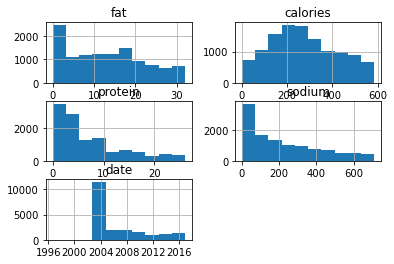

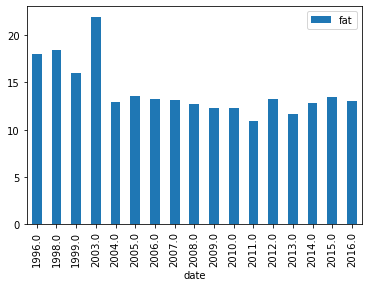

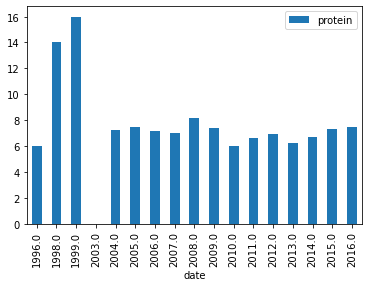

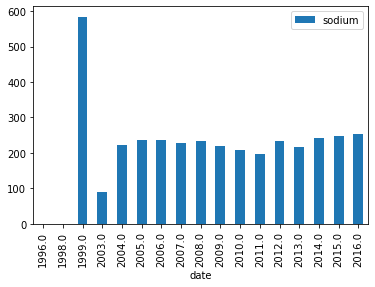

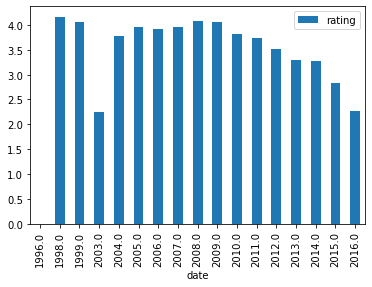

In [5]:
#Receitas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Primeiramente, observamos quais tipos de dado nós temos

r = pd.read_json('receitas.json')


#Com isso, observamos que os dados sao divididos em sua indexaçao, directions, fat
#date, categories, calories, desc, protein, rating, title, ingredients, sodium.
#Portanto, observamos como podemos extrair informações perante elas
categorias = []

rc = r['categories']
rc = rc.dropna()

i = 0
while (i<20111): 
    categorias = uniaolistaunica(categorias, rc.iloc[i])
    i+=1
  
   
#Com Isso, temos todas as categorias usadas nas receitas

#Primeiro, sabemos que os valores com NaN serao ignorados, ja que nao temos
#As informaçoes dos mesmos, portanto

Descricao = r.describe()

#Com isso, vimos que o valor maximo é alto demais para ser considerado razoavel
#Portanto, é importante retirarmos os mesmos para obtermos uma base de dados
#mais limpa. Podemos, por exemplo, remover os 25% dos dados mais altos.
# Para isso, utilizei o método dos quartis pois observa-se, devido ao fato dos valores que extra-
#polaram o razoável serem muito altos, a standard deviation tornou-se alta demais, portanto,
#inutilizável para filtrar os valores indesejáveis(isto é, as médias continuariam a ser altas
# demais para serem utilizáveis).

rfat = r['fat'][r['fat']<33]
rcalories = r['calories'][r['calories']<586]
rprotein = r['protein'][r['protein']<27]
rsodium = r['sodium'][r['sodium']<711]

Describe75 = pd.concat([rfat.describe(), rcalories.describe(),rprotein.describe(),rsodium.describe()], axis= 1)
    
    
# Com isso, obtemos valores razoaveis de cada um dos valores descritos
# Com isso, temos os valores de maneira muito mais consistente que a descriçao
#anterior.

#Com isso, agora precisamos fazer um histograma dos dados
plt.figure(0)
r75 =  pd.concat([rfat, rcalories,rprotein,rsodium,r['date']], axis= 1)
r75.hist()


#Enquanto o histograma do fat nos mostra um pico perto de 0, o que deve ser explicado
#Pois diversos pratos não apresentam gordura, devido a concentracao de outros componentes
#Já pelo resto do histograma segue uma tendencia relativamente linear, que pode ser
#explicada pelas diferentes concentrações dos alimentos
#Observamos que o mesmo possui um range interquartil de 15, que se comparado com a média é
#Relativamente alto. Também podemos observar que existe um tail para a esquerda


#Já o histograma das calorias, podemos observar a formação de uma gausiana perto das 200 calorias
#que representam aproximadamente as calorias médias necessarias para o ser humano para uma refeiçao
# Observamos que a concentraçao no 0 nao ocorre, pois calorias nunca serao 0, pois sao necessarias
#Para o corpo humano em geral.
#Já nesse caso, temos que o mesmo, por parecer mais uma gausiana, possui uma curtose menor, se
#comparado com os outros exemplos

#Já o histograma das proteinas podemos observar uma queda exponencial que acontece do 0, que pode
# ser explicada pela presença de massas e comidas com maior concentraçao de carboidratos, o que
#em tese diminui a concentraçao de proteinas em um alimento, devido ao range calórico que o corpo
#humano precisa absorver.
#Já em relaçao a esse caso, observamos uma alta curtose, com grande concentraçao para a esquerda
#da base de dados, onde a média>mediana


#Já em relação ao sódio, tambem observamos uma grande concentraçao no 0, que se deve as diversas
#Comidas sem sódio, mas de mesma forma observamos uma queda gausiana tendendo a 0, devido ao limite
#do corpo humano de consumo de sódio
# Em relação ao sódio, de mesma forma observamos uma alta curtose para a esquerda, explicada
#pela concentraçao de comidas com 0(ou proximo a isso) sódio.

#Já em relação as datas, podemos observar um grande pico por volta de 2004, que imagino que se deva
#por conta da necessidade de existir um numero minimo de receitas em um site antes do mesmo ser lancado
# Portanto, os mesmos foram acumulados e após o lancamento do site houveram novas postagens de receitas
#de forma aproximadamente constante.
#Também em relação as datas, a concentração de publicações perto de 2004 nos mostra a alta curtose
#para a esquerda da base de dados,  bastando simetrizarmos os valores que sera possível observar
#a curtose para a esquerda.



#Com isso, podemos analizar as postagens relacionadas a data de postagem da mesma.
plt.figure(1)
r75['calories'].groupby(r75["date"].dt.year).mean().plot(kind="bar",legend = 'Calorias')
plt.figure(2)
r75['fat'].groupby(r75["date"].dt.year).mean().plot(kind="bar",legend = 'fat')
plt.figure(3)
r75['protein'].groupby(r75["date"].dt.year).mean().plot(kind="bar",legend = 'protein')
plt.figure(4)
r75['sodium'].groupby(r75["date"].dt.year).mean().plot(kind="bar",legend = 'sodium')
plt.figure(5)
r['rating'].groupby(r75["date"].dt.year).mean().plot(kind="bar",legend = 'rating')


#Com isso, obtemos os valores médios de cada um a partir da data de postagem de cada um. Observamos
#Um padrao de queda nos ultimos anos do rating, o que pode significar que talvez seja necessário
#Mudar o padrão novos tipos de receitas adicionadas ao banco(de modo a melhorar a qualidade)
#Também observamos o ápice do rating nos primeiros dados, o que pode indicar que as melhores
#receitas foram escolhidas primeiro(o que seria esperado em um website), e posteriormente, com
#a escassez de novas receitas, foram escolhidas, em média, receitas com notas mais baixas.

#Também podemos observar um 0 na parte das proteinas em 2003, que pode ser explicado pela falta de categorizacao do website
#da informaçao no ano mencionado, visto que os NaNs foram removidos anteriormente.


[22:00:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       169
           1       0.86      0.86      0.86       161

    accuracy                           0.86       330
   macro avg       0.86      0.86      0.86       330
weighted avg       0.86      0.86      0.86       330
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       169
           1       0.87      0.89      0.88       161

    accuracy                           0.88       330
   macro avg       0.88      0.88      0.88       330
weighted avg       0.88      0.88      0.88       330
              precision    recall  f1-

<AxesSubplot:xlabel='x1', ylabel='x2'>

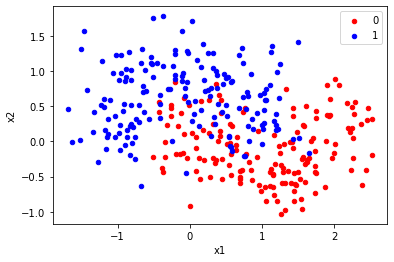

In [35]:
#Classificação

from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.naive_bayes import GaussianNB

classification_train = pd.read_csv('classification_train.csv')
classification_test = pd.read_csv('classification_test.csv')

#Com isso, observamos que possuimos os dados x1, x2 e target.

#Entao, precisamos testar qual classificador utilizaremos.  Utilizaremos as métricas de 
#Precision, Recall e F1-Score, as quais suas devidas funcoes ja estao importadas anteriormente



X_test = classification_test[['x1','x2']]
Y_test= classification_test['target']

X_train= classification_train[['x1','x2']]

Y_train = classification_train['target']

#Com isso, podemos normalizar nossa base de dados, para obter melhores resultados
#Ps: Ao normalizar, obtive piores resultados, entao continuei com os dados desnormalizados
#X_test = pd.DataFrame(scaler.fit_transform(X_test.astype(np.float32)),index = X_test.index, columns= X_test.columns)
#X_train = pd.DataFrame(scaler.transform(X_train.astype(np.float32)),index = X_train.index, columns = X_train.columns)


#Com isso, temos nossos dados de teste e de treino, portanto, podemos testar diferentes modelos e
#observar qual deles satisfaz melhor nossas métricas
classificadores = []

XGB = xgboost.XGBClassifier(use_label_encoder=False)
classificadores.append(XGB)

SVC = svm.SVC(kernel = 'rbf', C = 0.7, degree = 3, tol = 1e-3, probability = False, shrinking = True)
classificadores.append(SVC)

TREE = tree.DecisionTreeClassifier()
classificadores.append(TREE)

FOREST = RandomForestClassifier()
classificadores.append(FOREST)

GNB = GaussianNB()
classificadores.append(GNB)

acc = ''
for clf in classificadores:
    clf.fit(X_train, Y_train)
    y_pred= clf.predict(X_test)
    acc = acc + classification_report(Y_test, y_pred)
    
print(acc)
#Com isso, observamos que o modelo 2(isto é, o SVC) é o modelo que minimiza as métricas que
#Obtemos, portanto, temos nosso modelo, o SVC, utilizando nossa modelagem inicial
#Portanto, queremos as métricas iniciais do SVC

#Mas no entanto, obtemos em média uma precisao de .88 em precision, recall e f1 score, o que
#É possível melhorar?
#Tentei normalizar os dados, mas observei que a performance geral piorou.

#Tambem podemos comparar os dados entre os dois casos, e observamos que a performance de ambos
#Varia pouco, portanto, nao levantemos suspeitas de databases desbalanceadas(diferença de apenas 3%
#aproximadamente)

#Talvez ao observar os dados, poderemos entender melhor o funcionamento dos mesmos
ax = classification_test[classification_test['target']==1].plot(x = 'x1',y ='x2', color = 'red', kind = 'scatter', label = '0')
classification_test[classification_test['target']==0].plot(x = 'x1',y ='x2', color = 'blue', kind = 'scatter', ax = ax, label = '1')

#Ao observar os dados, podemos ver a separação entre os mesmos claramente, porem, podemos observar
#Portanto, podemos imaginar onde a nossa linha de separaçao se encontra
#Portanto, podemos fazer um ajuste dos hiperparametros
#Visualizando os dados, podemos testar diferentes formas de hiperparametros, para avaliarmos qual 
#funcionará melhor. Também foi testado diferentes parametros de regularizacao, para observarmos qua
#se comporta melhor
#Observa-se que a mudanca do parametro de regularizacao para perto de 1 nao altera tanto os 
#resultados finais, mas acarreta em mudancas de desbalanceamento(relacionadas aos outliers
#do tipo 1 e do tipo 0), portanto, o melhor valor que consegui chegar foi de C = 0.7
#Também fora testado o grau do da funcao polinomal do núcleo. A variação nao alterou resultado
#portanto, fora mantido o padrao de degree = 3
# A variaçao do grau de tolerancia para parada também nao alterou significativamente o resultado
#portanto, para a rapidez do código, fora mantida o grau padrao.
# A mudança da probabilidade de estimativa também nao alterou significativamente o resultado
#De mesma forma para o shrinking

#Portanto, observemos que, pela mudança de variáveis, conseguimos obter um classificador que 
#Apesar de outliers observados na parcela 0, possui robustez estatística significativa
#para boa parte das aplicações



Train: 1238.39 RMSE
 9.90 MAPE
Test: 1572.60 RMSE
 9.90 MAPE


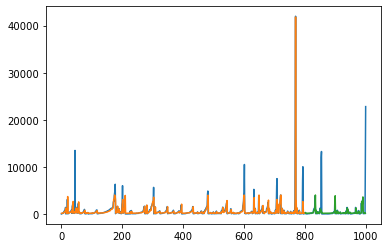

In [19]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


# Podemos, primeiramente, definir uma funcao que cria datasets
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

#Entao, inserindo a base de dados
dataframe = pandas.read_excel('time_series_data.xlsx')


#Escolhemos o produto B1 e dropamos os dados que nao sao importantes para esse caso especifico
dataframe = dataframe[dataframe['produto_descricao'] == 'B0']
dataframe.index = dataframe['nota_data_emissao']
dataframe.drop('nota_data_emissao',axis = 1, inplace = True)
dataframe.drop('produto_unidade_comercial',axis = 1, inplace = True)
dataframe.drop('produto_descricao',axis = 1, inplace = True)
dataframe.drop('produto_valor_unitario_comercializacao',axis = 1, inplace = True)

dataset = dataframe.values
dataset = dataset.astype('float32')

#Normalizamos os dados
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


#Separamos os dados de teste e de treino

train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# E utilizamos a funcao definida a priori para criar nossa base de dados
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

#E, com isso, colocamos no formato apropriado para inserir no LSTM(o método utilizado)
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#E, com isso, podemos criar nosso modelo. Resolvi utilizar 3 camadas de LSTM, pois, com um
#os resultados avaliados nas métricas foram muito inferiores ao desejado, o que tambem é esperado
#pois temos uma pequena base de dados para fazermos predicoes com reliabilidade
#Foi testado com diferentes epochs e batch sizes, epoch acima de 200 nao altera tanto o resultado
#Também tem a possibilidade maior de overfitting
model = Sequential()
model.add(LSTM(64, return_sequences = True,input_shape=(1, look_back)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(dataframe.shape[1]))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics = ['mean_squared_error', 'mean_absolute_percentage_error'])
model.fit(trainX, trainY, epochs=1000, batch_size=50, verbose=0)

#Com isso, verificamos nosso modelo em relacao aos dados de teste 
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

train = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
train2 = (mean_absolute_percentage_error(trainY[0], trainPredict[:,0]))
print('Train: %.2f RMSE' % (train))
print(' %.2f MAPE' % (train2))
test = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
test2= (mean_absolute_percentage_error(trainY[0], trainPredict[:,0]))
print('Test: %.2f RMSE' % (test))
print(' %.2f MAPE' % (test2))

#Com isso, podemos fazer uma predicao a partir da nossa base de dados

#Com isso, podemos plotar um gráfico

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
#Com isso, conseguimos obter dados relativamente parecidos nas metricas e teste e de treino, de maneira que os mesmos nao sofram
#de overtraining(ou under) e, podemos observar por meio do grafico que o modelo de teste consegue
#com a exceçao de outliers, prever a parte de treino.

Numero Ideal de Features: 5


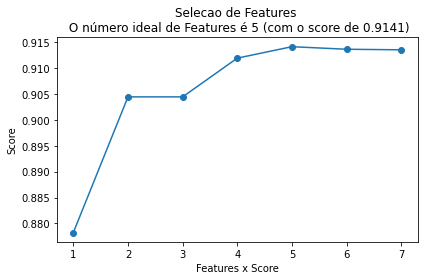

O RMSE para o teste é
RFECV(estimator=LinearRegression()):402.2695884686169
O R2 para o teste é
RFECV(estimator=LinearRegression()):0.8985943467520833
O RMSE apra o treino é 
RFECV(estimator=LinearRegression()):459.72325546517715
O R2 para o treino é
RFECV(estimator=LinearRegression()):0.9166204427464415


In [25]:
from sklearn.metrics import mean_squared_error, r2_score
import pandas
from math import sqrt
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
regression_train = pandas.read_csv('regression_train.csv')
regression_test = pandas.read_csv('regression_test.csv')

#Observamos que temos 7 colunas e a coluna target.
#Com isso, diminuimos os dados mas obtemos dados de maior qualidade, pois o NaN nos impedia de obter o modelo
X = regression_test = regression_test.dropna()
regression_train = regression_train.dropna()
regression_test = regression_test.reset_index(drop=True)
regression_train = regression_train.reset_index(drop=True)


#No entanto, observa-se que em ambos os dados temos algumas colunas que possuem o NaN
#O NaN referencia-se em relaçao a falta dos dados coletados? Ou em relaçao ao 0?
#Se for o primeiro caso, precisamos retirar os dados que nao sao completos, portanto, causam
#confusao para o algoritmo.
#Com isso, diminuimos os dados mas obtemos dados de maior qualidade
#Podemos fazer uma teste de selecao univariada para observar quais variaveis afetam mais o resultado

X = regression_train.drop('target', axis = 1)
y = regression_train['target']
X_teste = regression_test.drop('target',axis =1)
y_teste = regression_test['target']


regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X,y)

optimal_feature_count = feature_selector.n_features_
print(f"Numero Ideal de Features: {optimal_feature_count}")

X_new = X.loc[:, feature_selector.get_support()]
#Com isso, observamos que o melhor resultado é atingido com 5 features

plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_, marker = "o")
plt.ylabel("Score")
plt.xlabel("Features x Score")
plt.title(f"Selecao de Features \n O número ideal de Features é {optimal_feature_count} (com o score de {round(max(fit.grid_scores_), 4)})")
plt.tight_layout() 
plt.show()

#Com isso, podemos observar como o medo se comporta pelas métricas propostas
rmse = ''
R2 = ''
y_pred= feature_selector.predict(X_teste)
rmse = rmse + str(feature_selector)+':' + str(sqrt(mean_squared_error(y_teste, y_pred))) 
R2 = R2 + str(feature_selector ) + ':'+ str(r2_score(y_teste, y_pred))

#Também podemos ver como o modelo se comporta em relacao a nossos dados de treino, para observarmos se
#o mesmo sofre de overfitting(ou under)
print('O RMSE para o teste é')
print(rmse)
print('O R2 para o teste é')
print(R2)
y_pred1 = feature_selector.predict(X)

rmsetreino = ''
R2treino = ''
rmsetreino = rmsetreino + str(feature_selector)+':' + str(sqrt(mean_squared_error(y, y_pred1))) 
R2treino = R2treino + str(feature_selector ) + ':'+ str(r2_score(y, y_pred1))
print('O RMSE apra o treino é ')
print(rmsetreino)
print('O R2 para o treino é')
print(R2treino)
#Portanto, observamos que temos bons valores de R2 em ambos os casos, e, se observamos a escala
#do Target, também temos valores aceitaveis do rmse, portanto, considero um modelo bem aplicado